In [1]:
# Import libraries. Going to mess around with ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates

In [2]:
# Importing the data and checking
df = pd.read_csv(r'C:\Users\dymar\OneDrive\Desktop\crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [3]:
# Transforming date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
# Getting a dataframe containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9285290000,139325000000,0.1235,1608.16
2658,ethereum,ETH,Ethereum,2018-02-05,2,834.960000,856.650000,644.600000,697.950000,4269530000,81337400000,0.2516,212.05
4305,ripple,XRP,Ripple,2018-02-05,3,0.825943,0.833866,0.675827,0.691799,1286180000,32219400000,0.1011,0.16
4503,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,4,1159.890000,1172.700000,839.950000,887.410000,568117000,19659800000,0.1426,332.75
4631,cardano,ADA,Cardano,2018-02-05,5,0.385044,0.399523,0.319646,0.327371,658548000,9983060000,0.0967,0.08


In [5]:
# Printing the number of different cryptocurrencies in the data set.
print("Number of cryptocurrencies listed: ")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed: 


1461

In [6]:
# Starting dates for all currencies
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(10)

Oldest Cryptocurrencies


,name,ranknow,start_date
155,Bitcoin,1,2013-04-28
789,Litecoin,6,2013-04-28
916,Novacoin,483,2013-04-28
983,Peercoin,148,2013-04-28
1287,Terracoin,582,2013-04-28
890,Namecoin,241,2013-04-28
844,Mincoin,1006,2013-05-03
555,Freicoin,1016,2013-05-03
528,Feathercoin,269,2013-05-03
720,Ixcoin,923,2013-05-08


In [7]:
# List of the new ones
print("New Cryptocurrencies")
start_df.sort_values(['start_date']).tail(10)

New Cryptocurrencies


,name,ranknow,start_date
864,Monero Gold,1247,2018-02-02
1139,STK,1165,2018-02-02
970,Pareto Network,1288,2018-02-02
664,Huobi Token,1155,2018-02-03
361,DMarket,1308,2018-02-03
1477,adbank,1241,2018-02-03
1260,SwissBorg,1253,2018-02-03
1467,Zilla,1179,2018-02-03
719,Iungo,1242,2018-02-04
725,Jibrel Network,1158,2018-02-05


In [8]:
# Showing the top 10 cryptocurrencies by rank
latest_df[latest_df['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEO]
8          [Stellar]
9              [EOS]
10             [NEM]
Name: name, dtype: object

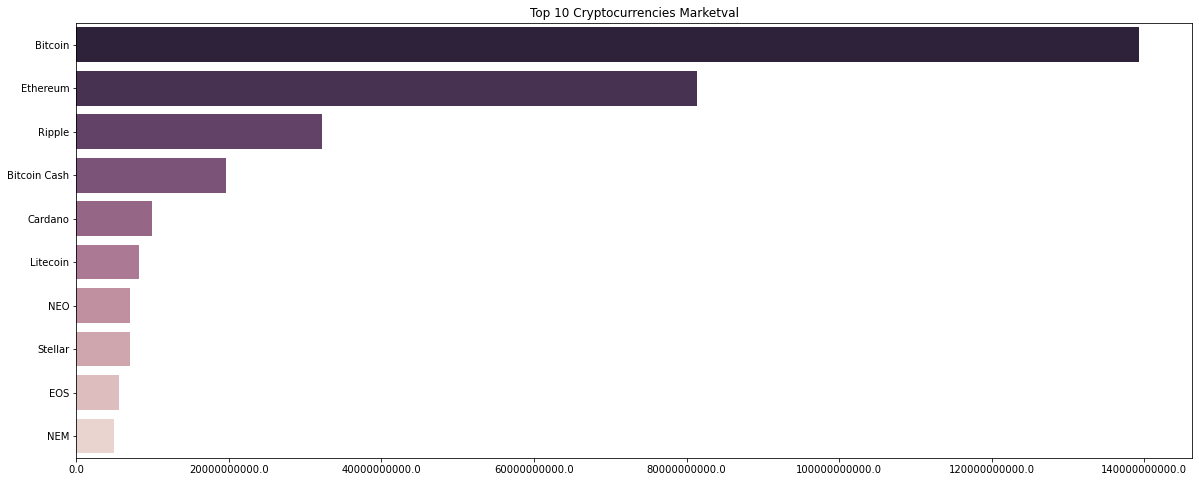

In [9]:
# Plotting the top 10 currencies according to market valuation. Enumerate is a good short cut for a loop.
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:10]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(10, reverse=True))
plt.title("Top 10 Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

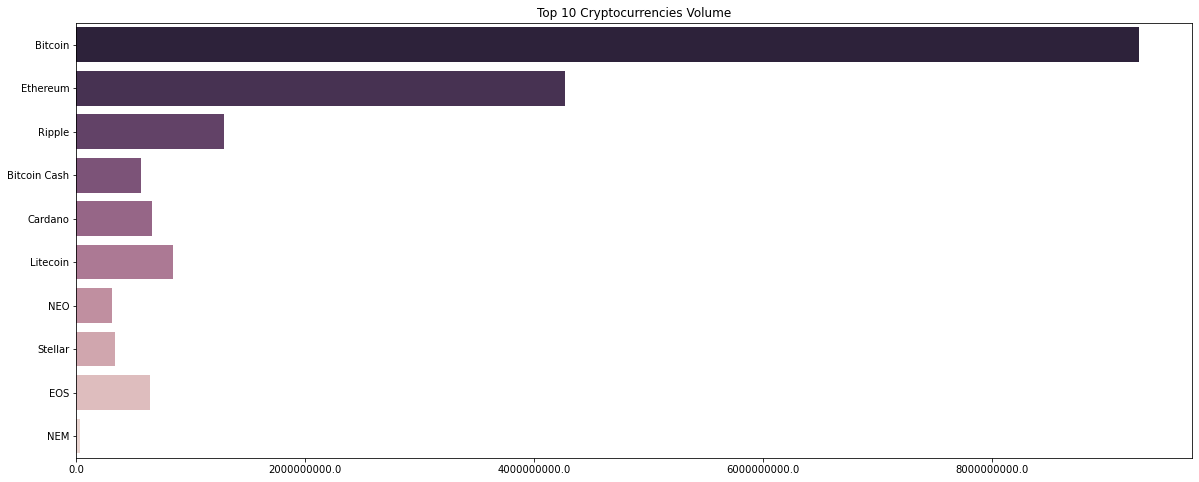

In [10]:
# Plotting the top X currencies by volume 
latest_df
currency = []
volume = []
x_currencies = name[:10]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(10, reverse=True))
plt.title("Top 10 Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

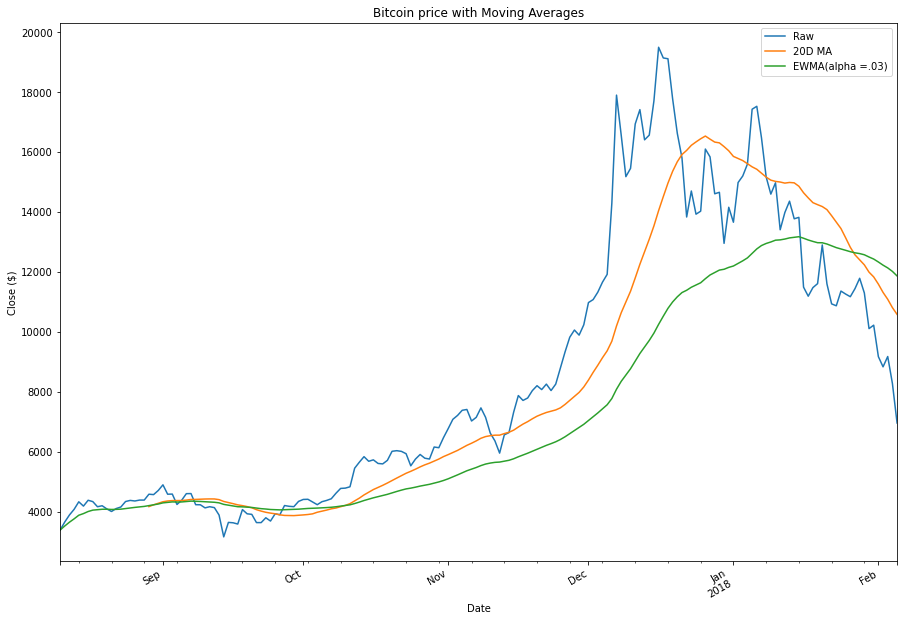

In [11]:
# Moving average chart for Bitcoin
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA(alpha =.03)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

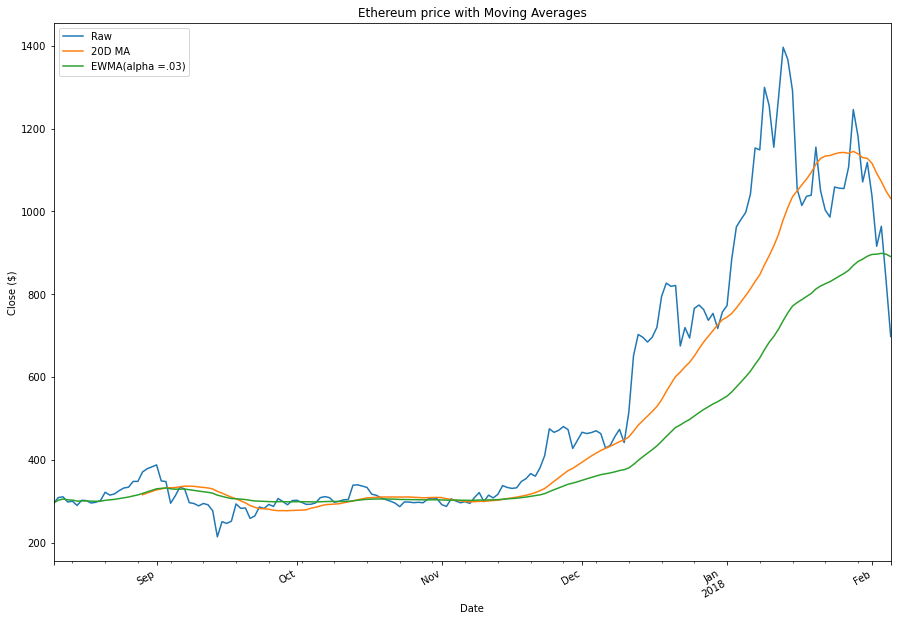

In [12]:
# Moving average chart for Ethereum
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA(alpha =.03)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

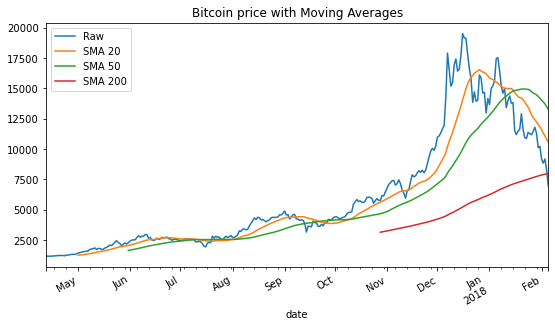

In [13]:
# Moving average chart for BTC
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# Simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()

smaplot =pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(9,5), legend=True, title="Bitcoin price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

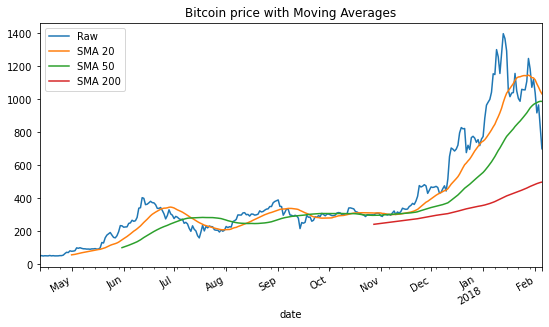

In [14]:
# Moving average chart for ETH
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(9,5), legend=True, title="Etherium price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

In [88]:
# Setting up the ARIMA model
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
from scipy.special import boxcox, inv_boxcox
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [17]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv(r'C:\Users\dymar\OneDrive\Desktop\crypto-markets.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [18]:
df.tail()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2018-02-01,bitcoin-atom,BCA,Bitcoin Atom,1515,45.95,55.17,41.70,42.95,38029,0,0.0928,13.47
2018-02-02,bitcoin-atom,BCA,Bitcoin Atom,1515,42.90,42.90,29.18,35.91,48024,0,0.4905,13.72
2018-02-03,bitcoin-atom,BCA,Bitcoin Atom,1515,35.99,36.71,30.10,30.74,27136,0,0.0968,6.61
2018-02-04,bitcoin-atom,BCA,Bitcoin Atom,1515,30.75,34.90,23.93,23.93,26370,0,0.0000,10.97
2018-02-05,bitcoin-atom,BCA,Bitcoin Atom,1515,25.52,27.42,19.25,19.68,17804,0,0.0526,8.17


In [19]:
# Extracting bitcoin data
btc=df[df['symbol']=='BTC']
btc.drop(['slug', 'volume','symbol','name','ranknow','market', 'close_ratio', 'spread'],axis=1,inplace=True)

In [21]:
btc.head()

,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21


# AutoRegressive Integrated Moving Average

The model has 3 parameters p, d, and q accounting for seasonality, trend, and noise in the dataset. We will fit the ARIMA model using a stats model which will return something called an AIC value (Akaike Information Criterion). The AIC scales how compatible the model fits the data and the complexity of the model. A model with a lot of features that fit the data will be given a larger AIC score, than a model with the same accuracy but a lesser number of features. Thus we are looking for a model which yields a low AIC score.

In [90]:
# Resampling to monthly frequency
btc_month = btc.resample('M').mean()

Dickey–Fuller test: p=0.998803


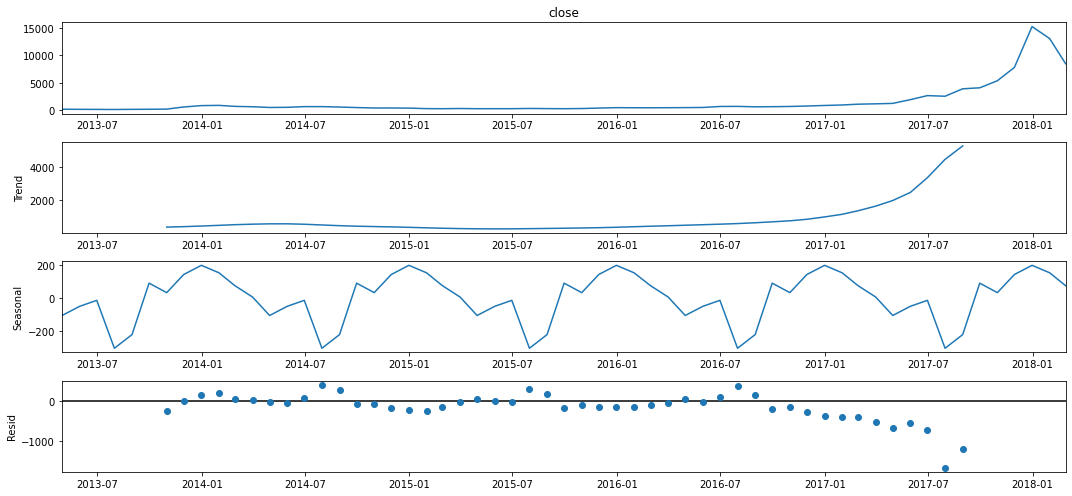

In [95]:
# Checking to see if data is stationary - it is not
seasonal_decompose(btc_month.close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close)[1])
plt.show()

# Box-Cox Transformation 

Lets use the Box-Cox transformation to suppress some of the variance.

The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data. In time series the process could have a non-constant variance. if the variance changes with time the process is nonstationary. It is often desirable to transform a time series to make it stationary. Sometimes after applying Box-Cox with a particular value of lambda the process may look stationary. It is sometimes possible that even if after applying the Box-Cox transformation the series does not appear to be stationary, diagnostics from ARIMA modeling can then be used to decide if differencing or seasonal differencing might be useful to to remove polynomial trends or seasonal trends respectively. After that the result might be an ARMA model that is stationary. If diagnostics confirm the orders p an q for the ARMA model, the AR and MA parameters can then be estimated.

In [96]:
# Box-Cox Transformations
btc_month['close_box'], lmbda = stats.boxcox(btc_month.close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])

Dickey–Fuller test: p=0.494475


# Differencing 
When building models to forecast time series data (like ARIMA), another pre-processing step is differencing the data (calculating sequentially xt−xt−1) until we get to a point where the series is stationary. Models account for oscillations but not for trends, and therefore, accounting for trends by differencing allows us to use the models that account for oscillations.

Once the model has been constructed, we can account for trends separately, by adding the trends component-wise.

# Seasonal differentiation 
One method of differencing data is seasonal differencing, which involves computing the difference between an observation and the corresponding observation in the previous year.

In [97]:
# Seasonal differentiation (12 months) - Not stationary
btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.661446


In [98]:
# Seasonal differentiation (3 months) - Stationary
btc_month['box_diff_seasonal_3'] = btc_month.close_box - btc_month.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.018033


# Regular differentiation 
Sometimes it may be necessary to difference the data a second time to obtain a stationary time series, which is referred to as second order differencing.

Dickey–Fuller test: p=0.002424


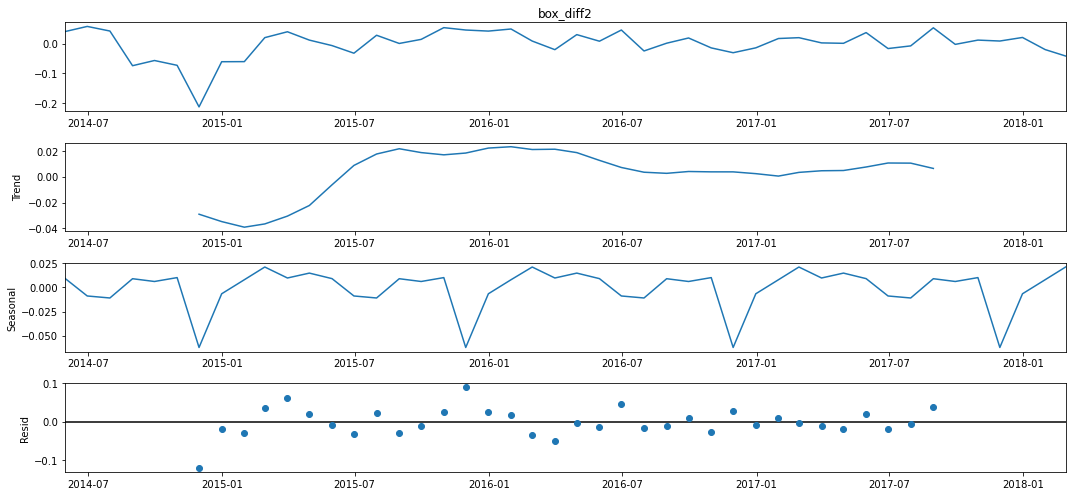

In [99]:
# Regular differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

plt.show()

# Autocorrelation 
Autocorrelation is the correlation of a time series with the same time series lagged. It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

We create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA components in the residuals.

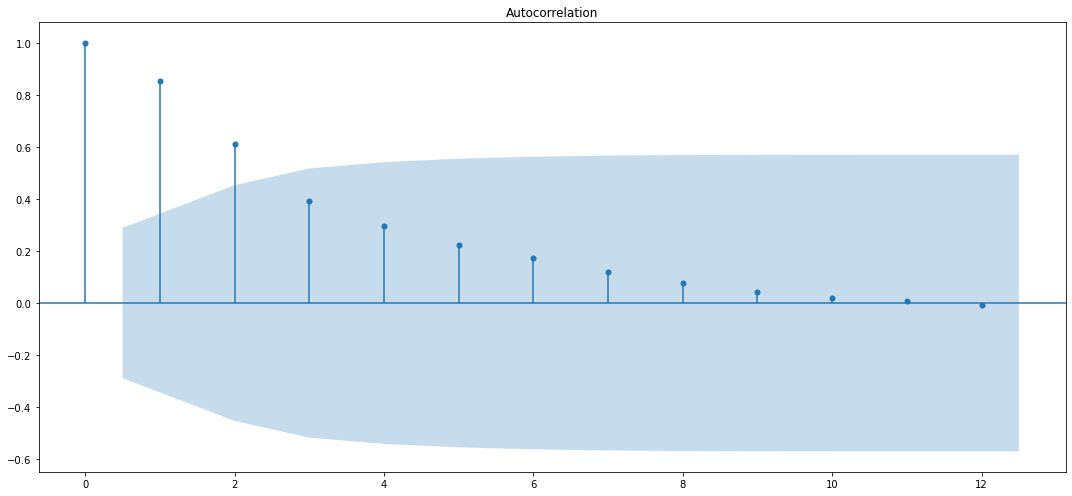

In [100]:
#autocorrelation_plot(btc_month.close)
plot_acf(btc_month.close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

There is a positive correlation with the first 10 lags that is perhaps significant for the first 2-3 lags.

A good starting point for the AR parameter of the model may be 3.

Lets try out autocorrelation on the differences...

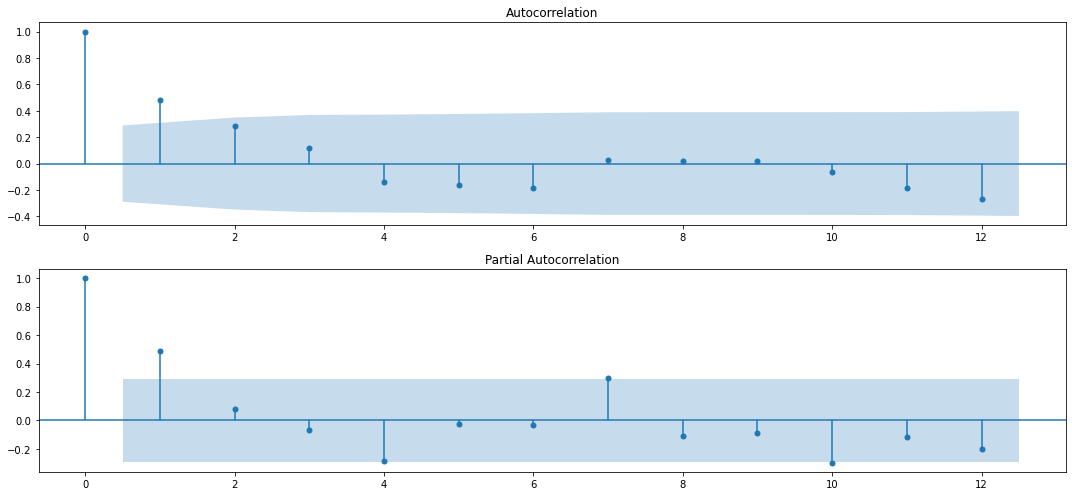

In [101]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)

# Plot the autocorrelation function
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)

plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()


There are not many spikes in the plots outside the insignificant zone (shaded) so there may not be enough information available in the residuals to be extracted by AR and MA models.

There may be a seasonal component available in the residuals at the lags of quarters (3 months) represented by spikes at these intervals. But probably not significant.

# ARIMA Model 
AutoRegressive Integrated Moving Average

ARIMA models are denoted with the notation ARIMA(p, d, q). These parameters account for seasonality, trend, and noise in datasets:

p - the number of lag observations to include in the model, or lag order. (AR)
d - the number of times that the raw observations are differenced, or the degree of differencing. (I)
q - the size of the moving average window, also called the order of moving average.(MA)

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model. A value of 0 for a parameter indicates to not use that element of the model.

Parameter Selection
We will iteratively explore different combinations of parameters. For each combination we fit a new ARIMA model with SARIMAX() and assess its overall quality.

We will use the AIC (Akaike Information Criterion) value, returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [104]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

Note that some parameter combinations may lead to numerical misspecifications and we explicitly disabled warning messages in order to avoid an overload of warning messages. These misspecifications can also lead to errors and throw an exception, so we catch these exceptions and just print out the parameter combinations that cause these issues.

In [105]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
3     (1, 0) -220.113589
1     (0, 1) -219.765332
4     (1, 1) -218.164003
6     (2, 0) -218.152069
2     (0, 2) -217.954259


Note the AICs are negative but this is not a problem.

Usually, AIC is positive; however, it can be shifted by any additive constant, and some shifts can result in negative values of AIC. [...] It is not the absolute size of the AIC value, it is the relative values over the set of models considered, and particularly the differences between AIC values, that are important.

Ref: Model Selection and Multi-model Inference: A Practical Information-theoretic Approach (Burnham and Anderson, 2004)

In [106]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                   59
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 112.057
Date:                Sun, 23 Jan 2022   AIC                           -220.114
Time:                        18:11:08   BIC                           -215.993
Sample:                    04-30-2013   HQIC                          -218.508
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3743      0.152      2.470      0.014       0.077       0.671
sigma2         0.0012      0.000     11.215      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.02   Jarque-

# Analysis of Results 
The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

In [107]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.006637


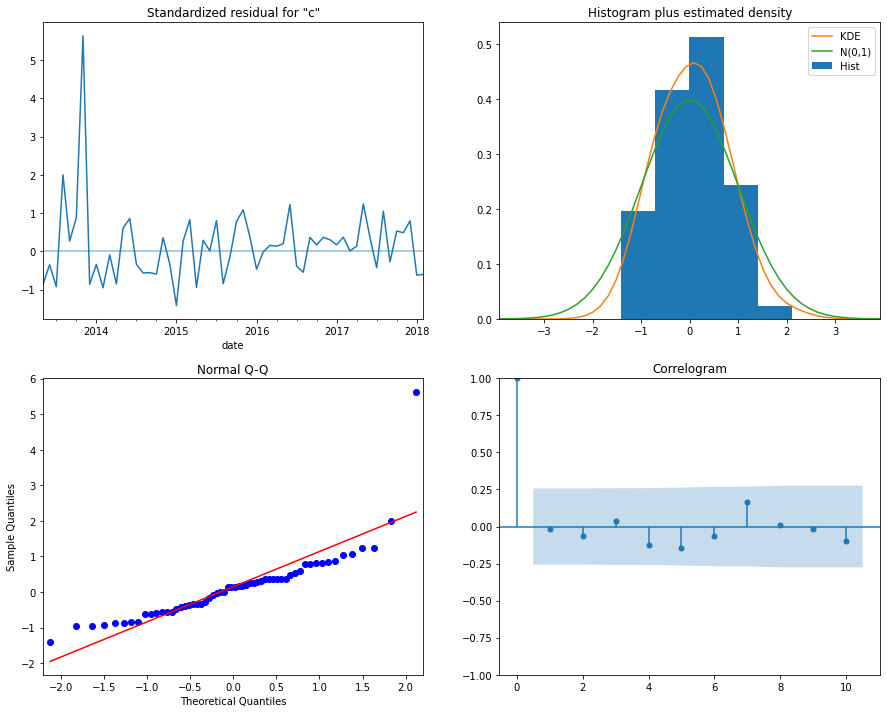

In [108]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the histogram (top right), the KDE line should follow the N(0,1) line (normal distribution with mean 0, standard deviation 1) closely. This is an indication whether the residuals are normally distributed or not.

In the Q-Q-plot the ordered distribution of residuals (blue dots) should follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is an indication whether the residuals are normally distributed.

The standardized residual plot doesn't display any obvious seasonality. 
This is confirmed by the autocorrelation plot, which shows that the time series residuals have low correlation with lagged versions of itself.

Conclusion: We may consider trying to standardise the distribution further. But lets go ahead and do a prediction anyway...

In [109]:
# Inverse Box-Cox Transformation Function - Box up some lambdas 
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

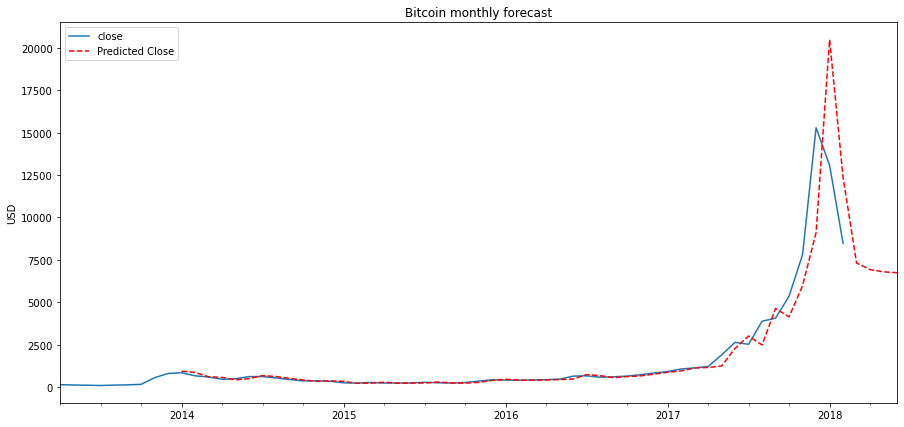

In [110]:
# Prediction
btc_month_pred = btc_month[['close']]
date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2014, 1, 31), end=datetime(2018, 6, 30)), lmbda)

plt.figure(figsize=(15,7))
btc_month_pred.close.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')
plt.show()

SARIMAX Model 
Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model

I didn't expect the bitcoin data to display any seasonality but apparently it does display slight seasonality. So lets try to improve the model by using SARIMA.

When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

I have tried out this model with yearly and quarterly periods (toggle the commented out lines to see 12-month seasonal).

Parameter Selection
The same process of parameter selection for seasonal ARIMA. For each combination we fit a new seasonal ARIMA model with SARIMAX() and assess its overall quality.

In [112]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [113]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
21  (1, 0, 1, 1) -193.013243
49  (2, 2, 0, 1) -192.918120
19  (1, 0, 0, 1) -192.665591
7   (0, 1, 0, 1) -192.235982
9   (0, 1, 1, 1) -192.174955
                                      SARIMAX Results                                      
Dep. Variable:                           close_box   No. Observations:                   59
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 4)   Log Likelihood                 100.507
Date:                             Sun, 23 Jan 2022   AIC                           -193.013
Time:                                     19:03:57   BIC                           -185.057
Sample:                                 04-30-2013   HQIC                          -189.945
                                      - 02-28-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

# Analysis of Results

In [114]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.085340


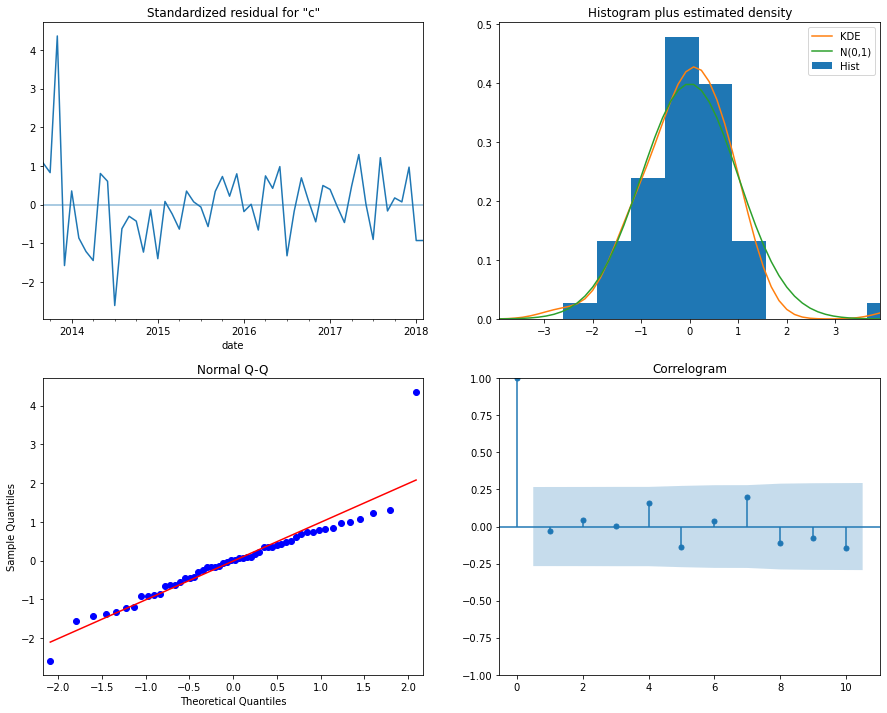

In [115]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.085340


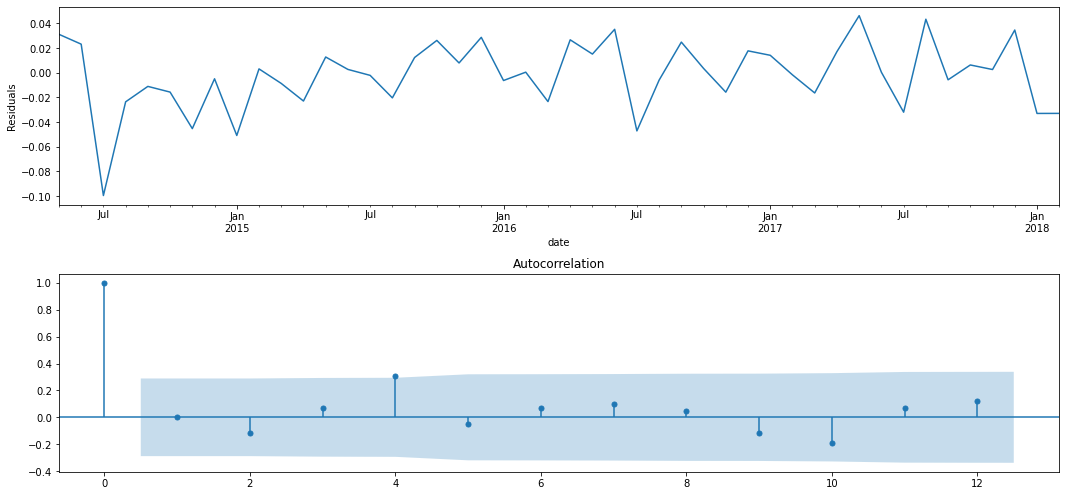

In [116]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

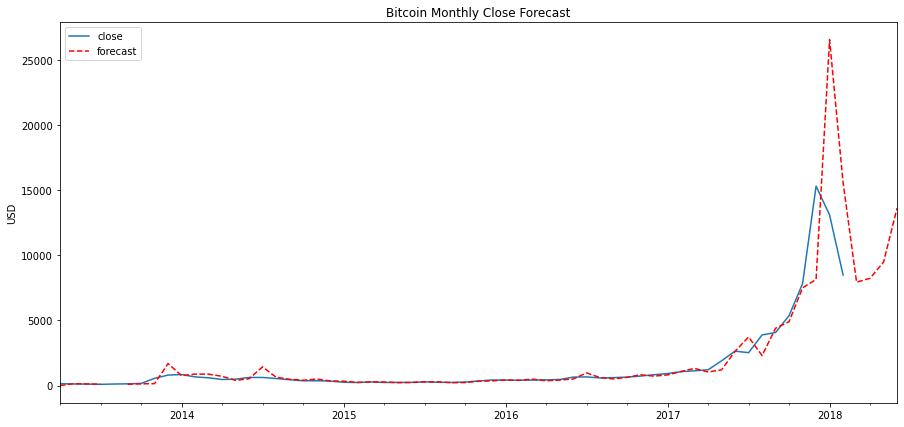

In [117]:
# Prediction
btc_month2 = btc_month[['close']]
date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month2 = pd.concat([btc_month2, future])

btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)

plt.figure(figsize=(15,7))
btc_month2.close.plot()
btc_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('bitcoin_monthly_forecast.png')
plt.show()

# Validation 
A simple indicator of how accurate out forecast is is the root mean square error (RMSE). So lets calcualte RMSE for the one-step ahead predictions starting from 2015, through to the end of 2017.

In [118]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2015-01-01':'2017-01-01'].close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 85.2


A better representation of longer-term predictive power can be obtained using dynamic forecasts. In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In the code chunk below, we specify to start computing the dynamic forecasts and confidence intervals from mid 2017 onwards.

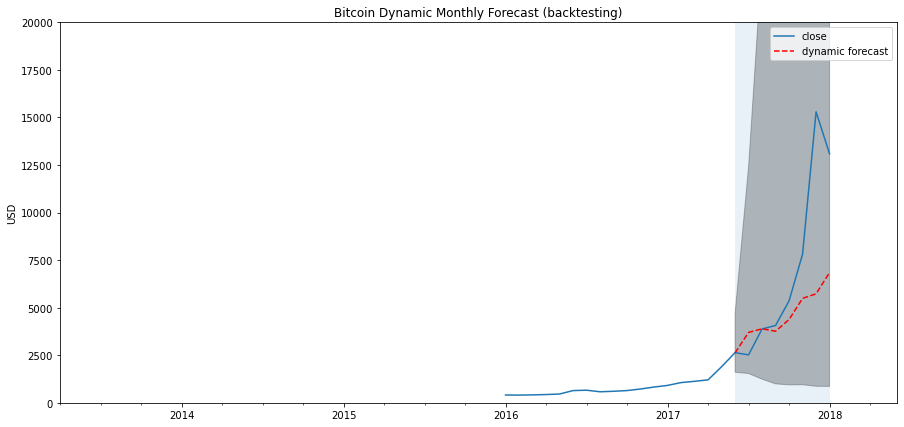

In [119]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-06-30')
t2 = pd.to_datetime('2018-01-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.close['2016':'2018-01'].plot(label='close')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show()

This is pretty bad but not surprising given how the prices started going insane around late 2017. Lets see how well the model does in a different time period when things were a little more normal.

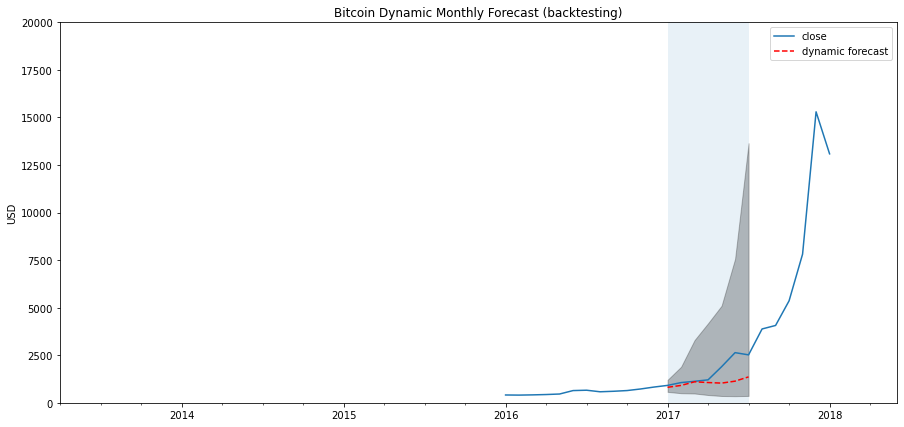

In [120]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-01-31')
t2 = pd.to_datetime('2017-07-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.close['2016':'2018-01'].plot(label='close')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show()

The results indicate that the model is still a little rough and not something we should use as trading advice, but that was not unexpected due to the extremely volatile nature of cryptocurrencies, especially in the last 6 months.

It is probably also not such a good idea to try and predict 6 months into the future as we can see how insane even the 80% confidence interval becomes out this far. Maybe sticking to 1 month advance predictitons is more sensible. Or maybe even predicting on a daily basis.

There are a number of things we could do to potentially improve the model.

- Use a different technique to standardise the distribution
- Use different differentiation techniques
- Discard the time period before cryptocurrencies started taking off
- Try modelling per day instead of month, with a smaller forecast window
- Use other models or machine learning instead of ARIMA